In [1]:
import pyemma
pyemma.__version__

import numpy as np
%pylab inline

import itertools

import matplotlib.pylab as plt

import string
import re
import os
import pyemma.coordinates as coor
from itertools import combinations
%pylab inline
import pyemma.msm as msm
import pyemma.plots as mplt
from pyemma import config
import mdtraj

/home/ccalvotusell/.conda/envs/py27/lib/python2.7/site-packages/pyemma/util/log.py:65: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)


Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/home/ccalvotusell/.conda/envs/py27/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/home/ccalvotusell/.conda/envs/py27/lib/python2.7/site-packages/pyemma/__init__.py:91: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.4.
  .format(latest=latest, current=current), category=UserWarning)


In [2]:
import pyemma
import re
import os
import string
import matplotlib.pylab as plt
import numpy as np
from pylab import *
import pyemma.msm as msm
import pyemma.plots as mplt
import pyemma.coordinates as coor
from itertools import combinations
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ccalvotusell/.conda/envs/py27/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['info', 'linalg', 'random', 'fft', 'power']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


To analyze and compare the different variants, we will use the trajectories of the protein backbone.
In the first step, we will align all the trajectories to a reference .pdb 

In [3]:
# First we align trajectories to the same reference with mdtraj
# Make sure the path is correct!


top1='/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/ref_backbone_top.pdb'
path_input1="/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test"
path_notebook="/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test"


dirList=sorted(os.listdir(path_input1))
dirList2=sorted(os.listdir(path_notebook))

trajs_all=[]
tops=[]

for filename in dirList:
    if "v2_all.dcd" in filename.lower():
        print ("Aligning traj: "+str(filename))
        trajectory=mdtraj.load_dcd((path_input1+"/"+filename),top=top1)
        topology=mdtraj.load_pdb(top1)
        aligned_traj=mdtraj.Trajectory.superpose(trajectory,reference=topology,frame=0)
        print ("Saving aligned traj: "+str(filename))
        filename=filename.replace(".dcd","")+"_mdtraj_aligned.dcd"
        mdtraj.Trajectory.save_dcd(aligned_traj, filename)


Aligning traj: quadruple_mutant_backbone_v2_all.dcd
Saving aligned traj: quadruple_mutant_backbone_v2_all.dcd
Aligning traj: triple_mutant_backbone_v2_all.dcd
Saving aligned traj: triple_mutant_backbone_v2_all.dcd
Aligning traj: wt_backbone_v2_all.dcd
Saving aligned traj: wt_backbone_v2_all.dcd


In [5]:
#List of the alignes trajectories

dirList2=sorted(os.listdir(path_notebook))

for filename in dirList2:
	if ("all" and "aligned.dcd") in filename.lower():
		trajs_all.append(path_notebook+"/"+filename)

In [6]:
trajs=[]

trajs.append(trajs_all)


In [16]:
#Check the trajectories selectes:
trajs

[['/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/quadruple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
  '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/triple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
  '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/wt_backbone_v2_all_mdtraj_aligned.dcd',
  '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/quadruple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
  '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/triple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
  '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/wt_backbone_v2_all_mdtraj_aligned.dcd']]

In [9]:
tops.append(top1)

In [11]:
#Check the topology file (reference)
tops

['/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/ref_backbone_top.pdb']

In [12]:
#Selecting the features to run PCs, in this case, the Ca

feats=[]

for top in tops:
    feat = pyemma.coordinates.featurizer(top)
    sele=feat.select_Ca()
  #  feat.add_distances_ca
  #  feat.add_backbone_torsions() 
  #  feat.add_chi1_torsions() 
#    feat.add_dihedrals  
    feat.add_selection(sele)
    feats.append(feat)

In [13]:
feats

In [14]:
sources=[]

for traj in range(0,len(trajs)):
    print (traj,len(trajs))
    sources.append(pyemma.coordinates.load(trajs[traj],features=feats[traj],chunk_size=100,stride=1))

(0, 1)
03-07-24 08:29:35 pyemma.coordinates.data.feature_reader.FeatureReader[0] WARNING  duplicate files/arrays detected


Box(children=(Text(value=u''), IntProgress(value=0)))

In [15]:
sources[0][1]

array([[ 0.5319    ,  4.215     ,  1.3539    , ...,  3.6601002 ,
        -2.2299001 , -2.3956    ],
       [ 0.22129755,  4.4245243 ,  1.0199289 , ...,  3.3887908 ,
        -2.113079  , -2.5115945 ],
       [ 1.1187497 ,  3.0235121 ,  1.7801154 , ...,  3.478394  ,
        -0.921851  , -2.1735582 ],
       ...,
       [-0.69296163,  2.4899945 ,  2.4222932 , ...,  0.99812233,
        -1.1723275 , -2.373812  ],
       [-0.7223547 ,  2.4729478 ,  2.4503224 , ...,  0.79873663,
        -1.3993615 , -2.417215  ],
       [-0.6259856 ,  2.600372  ,  2.4682195 , ...,  0.8018989 ,
        -1.439138  , -2.483189  ]], dtype=float32)

# Principal Component Analysis (PCA)

In [17]:
#Select sources[0] if you want to select all trajectories as input. 
#Select sources[0][0] if you want to select the first on the list and so on.

data_1=sources[0]

In [18]:
pca_data1=pyemma.coordinates.pca(data_1,dim=-1,stride=1)

Box(children=(Text(value=u''), IntProgress(value=0)))

In [19]:
print(len(sources[0][1]))

4801


In [20]:
P_test = pca_data1.get_output()

Box(children=(Text(value=u''), IntProgress(value=0)))

Text(0.5,0,'time (2 ns)')

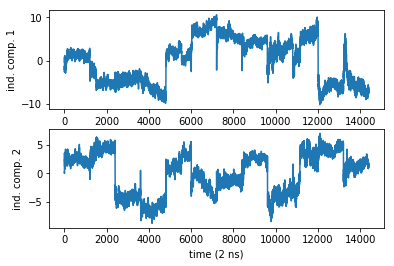

In [21]:
Y_testt=np.vstack(P_test)

subplot2grid((2,1),(0,0))
plot(Y_testt[:,0])
ylabel('ind. comp. 1')
subplot2grid((2,1),(1,0))
plot(Y_testt[:,1])
ylabel('ind. comp. 2')
xlabel('time (2 ns)')

In [22]:
np.savetxt('pca_comp1_wt.txt', Y_testt[:, 0])
np.savetxt('pca_comp2_wt.txt', Y_testt[:, 1])

In [23]:
print(len(sources[0][0]))

4801


In [29]:
# We now compute the free energy of the combined dataset of MD data for all the variants
eix_x=0
eix_y=1

all_data=np.vstack(P_test)

#fig, axes = plt.subplots(1, 1, sharex=True, sharey=True)
#pyemma.plots.plot_free_energy(all_data[:,eix_x], all_data[:,eix_y],legacy=False,ax=axes)
#axes.set_xlabel('PC1')
#axes.set_ylabel('PC2')
#axes.set_aspect('equal')
#fig.tight_layout()


In [26]:
#Defining the plot settings


def plot_Nice_PES(P_test,bins,sigma):
    import scipy.ndimage
    from scipy.ndimage.filters import gaussian_filter
    from matplotlib.ticker import FormatStrFormatter
    
    mpl.style.use("seaborn-paper")
    alldata=np.vstack(P_test)
    min1=np.min(alldata[:,0])
    max1=np.max(alldata[:,0])
    min2=np.min(alldata[:,1])
    max2=np.max(alldata[:,1])
    
    tickspacing1=5.0
    tickspacing2=5.0
    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=bins)
#    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=50)
    z += 0.1
    # compute free energies
    F = -np.log(z)
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]

    xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=20)
    yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=20)
    #data = scipy.ndimage.zoom(F.T, 200)
#    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
    plt.contourf(data,alpha=0.5,cmap='viridis', cbar=True,levels=levels,extent=extent)
    plt.xlabel('PC1', size=20)
    plt.ylabel('PC2', size=20)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

#    plot(cc_x_rep1,cc_y_rep1, linewidth=0, marker='o', markersize=5, color='black)
#    for i in range(n_clusters):
#        annotate("%i"%i, xy=(cc_x_rep1[i],cc_y_rep1[i]), size=15)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
    cax = plt.axes([0.81, 0.1, 0.02, 0.7])
    plt.colorbar(cax=cax, format='%.1f').set_label('Free energy (kcal/mol)', fontsize=14, labelpad=5, y= 0.5)
    cax.axes.tick_params(labelsize=14)
    #plt.colorbar(cax=cax, format='%.2f').tick_params(labelsize=10)
    #       savefig('./contour_plot_tica_kmeans.png')-- 

/home/ccalvotusell/.conda/envs/py27/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'cbar'
  s)


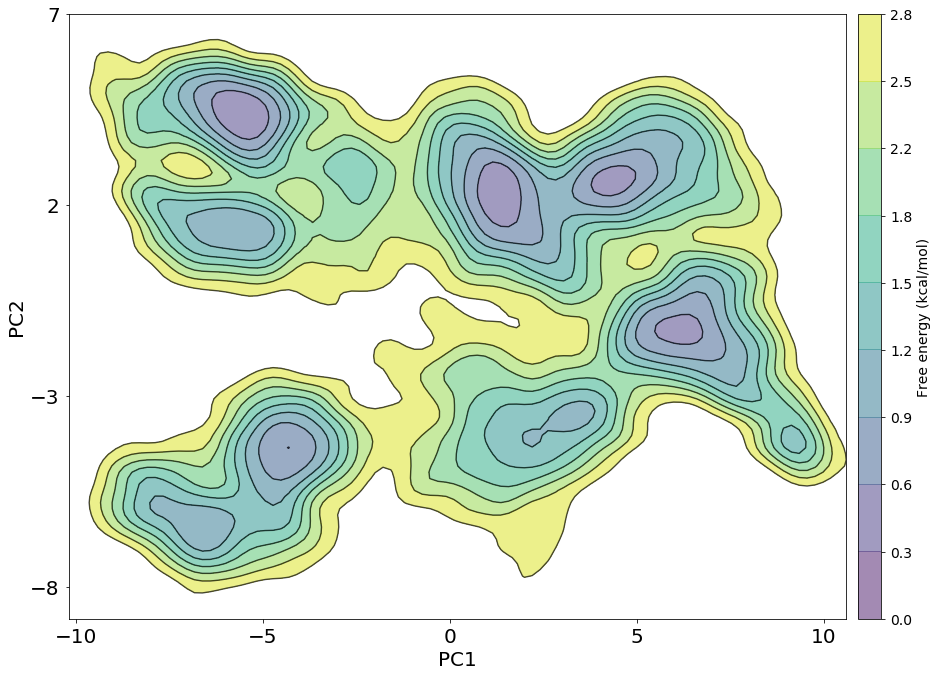

In [27]:
##Displaying the plot

figure(figsize=(16, 12))
#plt.ylim(-1.1,2)
#plt.xlim(-3.3, 1.5)
#plt.title('1VA4 wild-type',fontweight='bold', size=20)
plot_Nice_PES(all_data,100,2)
#plt.xlim(-3.5, 2)
#lt.tick_params(axis='x', labelsize=14)
#lt.tick_params(axis='y', labelsize=14)

# Projection

In [33]:
#select the trajectories you want to project e.g. sources[0][0]

all_proj=pca_data1.transform(sources[0])

In [34]:
wt_proj=pca_data1.transform(sources[0][2])

In [35]:
triple_proj=pca_data1.transform(sources[0][1])

In [36]:
quadruple_proj=pca_data1.transform(sources[0][0])

In the next cell, we are going to define the settings to plot the PCS of all the MD data (joint simulations:WT+triple+quadruple mutants) and then the setting to project the different variants in different colors

In [37]:

def plot_Nice_PES(all_data,bins,sigma):
    import scipy.ndimage
    from scipy.ndimage.filters import gaussian_filter
    from matplotlib.ticker import FormatStrFormatter


# ALL DATA (comes from all_data=np.vstack(P_test))
    mpl.style.use("seaborn-paper")
    all_data=np.vstack(all_proj)
    min1=np.min(all_data[:,0])
    max1=np.max(all_data[:,0])
    min2=np.min(all_data[:,1])
    max2=np.max(all_data[:,1])

    tickspacing1=1.0
    tickspacing2=1.0
    z,x,y = np.histogram2d(all_data[:,0], all_data[:,1], bins=bins)
    z += 0.1
    # compute free energies
    F = -np.log(z)
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]
    #extent = [-15, 15, -15, 15]

    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.4,cmap=None, cbar=True, levels=levels,extent=extent)
    plt.contourf(data,alpha=0.2,cmap='viridis', cbar=True,levels=levels,extent=extent)
    plt.tick_params(axis='x', labelsize=29)
    plt.tick_params(axis='y', labelsize=29)

# WT flA3B
    mpl.style.use("seaborn-paper")
    all_data_wt=np.vstack(wt_proj)
    min1a=np.min(all_data_wt[:,0])
    max1a=np.max(all_data_wt[:,0])
    min2a=np.min(all_data_wt[:,1])
    max2a=np.max(all_data_wt[:,1])

    tickspacing1=1.0
    tickspacing2=1.0
    za,xa,ya = np.histogram2d(all_data_wt[:,0], all_data_wt[:,1], bins=bins)
    za += 0.1
    # compute free energies
    Fa = -np.log(za)
    # contour plot
    extent = [xa[0], xa[-1], ya[0], ya[-1]]


    dataa = gaussian_filter((Fa.T)*0.592-np.min(Fa.T)*0.592, sigma)
    levels=np.linspace(0,np.max(dataa)-0.5,num=10)
    plt.contour(dataa,colors='black',linestyles='solid',alpha=0.9,cmap=None, cbar=True, levels=levels,extent=extent)
    plt.contourf(dataa,alpha=0.4,cmap='Purples', cbar=True,levels=levels,extent=extent)
    plt.tick_params(axis='x', labelsize=29)
    plt.tick_params(axis='y', labelsize=29)
    
# TRIPLE MUTANT
    mpl.style.use("seaborn-paper")
    all_data_triple=np.vstack(triple_proj)
    min1b=np.min(all_data_triple[:,0])
    max1b=np.max(all_data_triple[:,0])
    min2b=np.min(all_data_triple[:,1])
    max2b=np.max(all_data_triple[:,1])

    tickspacing1=1.0
    tickspacing2=1.0
    zb,xb,yb = np.histogram2d(all_data_triple[:,0], all_data_triple[:,1], bins=bins)
    zb += 0.1
    # compute free energies
    Fb = -np.log(zb)
    # contour plot
    extent = [xb[0], xb[-1], yb[0], yb[-1]]


    datab = gaussian_filter((Fb.T)*0.592-np.min(Fb.T)*0.592, sigma)
    levels=np.linspace(0,np.max(datab)-0.5,num=10)
    plt.contour(datab,colors='black',linestyles='solid',alpha=0.9,cmap=None, cbar=True, levels=levels,extent=extent)
    plt.contourf(datab,alpha=0.4,cmap='Greens', cbar=True,levels=levels,extent=extent)
    plt.tick_params(axis='x', labelsize=29)
    plt.tick_params(axis='y', labelsize=29)   
    
    
#    # QUADRUPLE MUTANT
    mpl.style.use("seaborn-paper")
    all_data_quad=np.vstack(quadruple_proj)
    min1c=np.min(all_data_quad[:,0])
    max1c=np.max(all_data_quad[:,0])
    min2c=np.min(all_data_quad[:,1])
    max2c=np.max(all_data_quad[:,1])

    tickspacing1=1.0
    tickspacing2=1.0
    zc,xc,yc = np.histogram2d(all_data_quad[:,0], all_data_quad[:,1], bins=bins)
    zc += 0.1
    # compute free energies
    Fc = -np.log(zc)
    # contour plot
    extent = [xc[0], xc[-1], yc[0], yc[-1]]


    datac = gaussian_filter((Fc.T)*0.592-np.min(Fc.T)*0.592, sigma)
    levels=np.linspace(0,np.max(datac)-0.5,num=10)
    plt.contour(datac,colors='black',linestyles='solid',alpha=0.9,cmap=None, cbar=True, levels=levels,extent=extent)
    plt.contourf(datac,alpha=0.4,cmap='OrRd', cbar=True,levels=levels,extent=extent)
    plt.tick_params(axis='x', labelsize=29)
    plt.tick_params(axis='y', labelsize=29)   

# COLORBAR

    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
    cax = plt.axes([0.81, 0.1, 0.02, 0.7])
    plt.colorbar(cax=cax, format='%.1f',cmap='viridis').set_label('Free energy (kcal/mol)', fontsize=14, labelpad=5, y= 0.5)
    cax.axes.tick_params(labelsize=14)

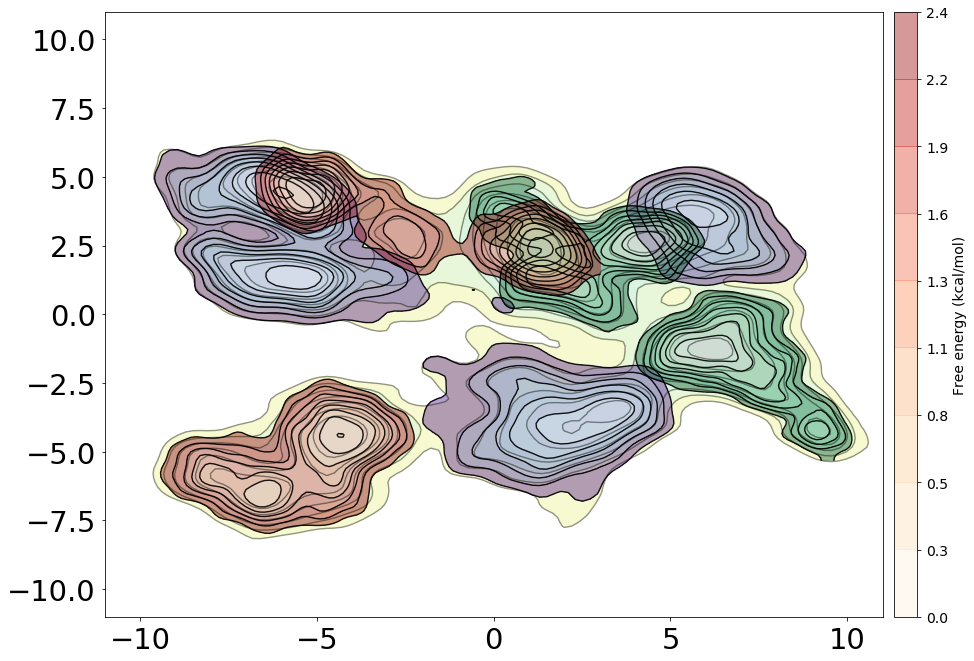

In [38]:
figure(figsize=(16, 12))
plt.ylim(-11,11)
plt.xlim(-11,11)
#plt.title('1VA4 wild-type',fontweight='bold', size=20)
plot_Nice_PES(all_data,100,2)
#plt.xlim(-3.5, 2)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

## Compare in different plots

In the first cell, we define again the setting of the plot. In the second cell we can compare the PCs of the different variants between them (we can change the input data here: plot_Nice_PES(all_proj,100,2) )

In [43]:
def plot_Nice_PES(P_test,bins,sigma):
    import scipy.ndimage
    from scipy.ndimage.filters import gaussian_filter
    from matplotlib.ticker import FormatStrFormatter
    
    mpl.style.use("seaborn-paper")
    alldata_apo=np.vstack(P_test)
    min1=np.min(alldata_apo[:,0])
    max1=np.max(alldata_apo[:,0])
    min2=np.min(alldata_apo[:,1])
    max2=np.max(alldata_apo[:,1])
    
    tickspacing1=1.0
    tickspacing2=1.0
    z,x,y = np.histogram2d(alldata_apo[:,0], alldata_apo[:,1], bins=bins)
#    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=50)
    z += 0.1
    # compute free energies
    F = -np.log(z)
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]
    #extent = [-15, 15, -15, 15]


#    xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=20)
#    yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=20)
    #data = scipy.ndimage.zoom(F.T, 200)
#    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.9,cmap=None, cbar=True, levels=levels,extent=extent)
    plt.contourf(data,alpha=0.4,cmap='viridis', cbar=True,levels=levels,extent=extent)
#    plt.xlabel('PC1', size=30)
#    plt.ylabel('PC2', size=30)
    plt.tick_params(axis='x', labelsize=29)
    plt.tick_params(axis='y', labelsize=29)

#    plot(cc_x_rep1,cc_y_rep1, linewidth=0, marker='o', markersize=5, color='black)
#    for i in range(n_clusters):
#        annotate("%i"%i, xy=(cc_x_rep1[i],cc_y_rep1[i]), size=15)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
    cax = plt.axes([0.81, 0.1, 0.02, 0.7])
    plt.colorbar(cax=cax, format='%.1f').set_label('Free energy (kcal/mol)', fontsize=14, labelpad=5, y= 0.5)
    cax.axes.tick_params(labelsize=14)
    #plt.colorbar(cax=cax, format='%.2f').tick_params(labelsize=10)
    #       savefig('./contour_plot_tica_kmeans.png')-- 

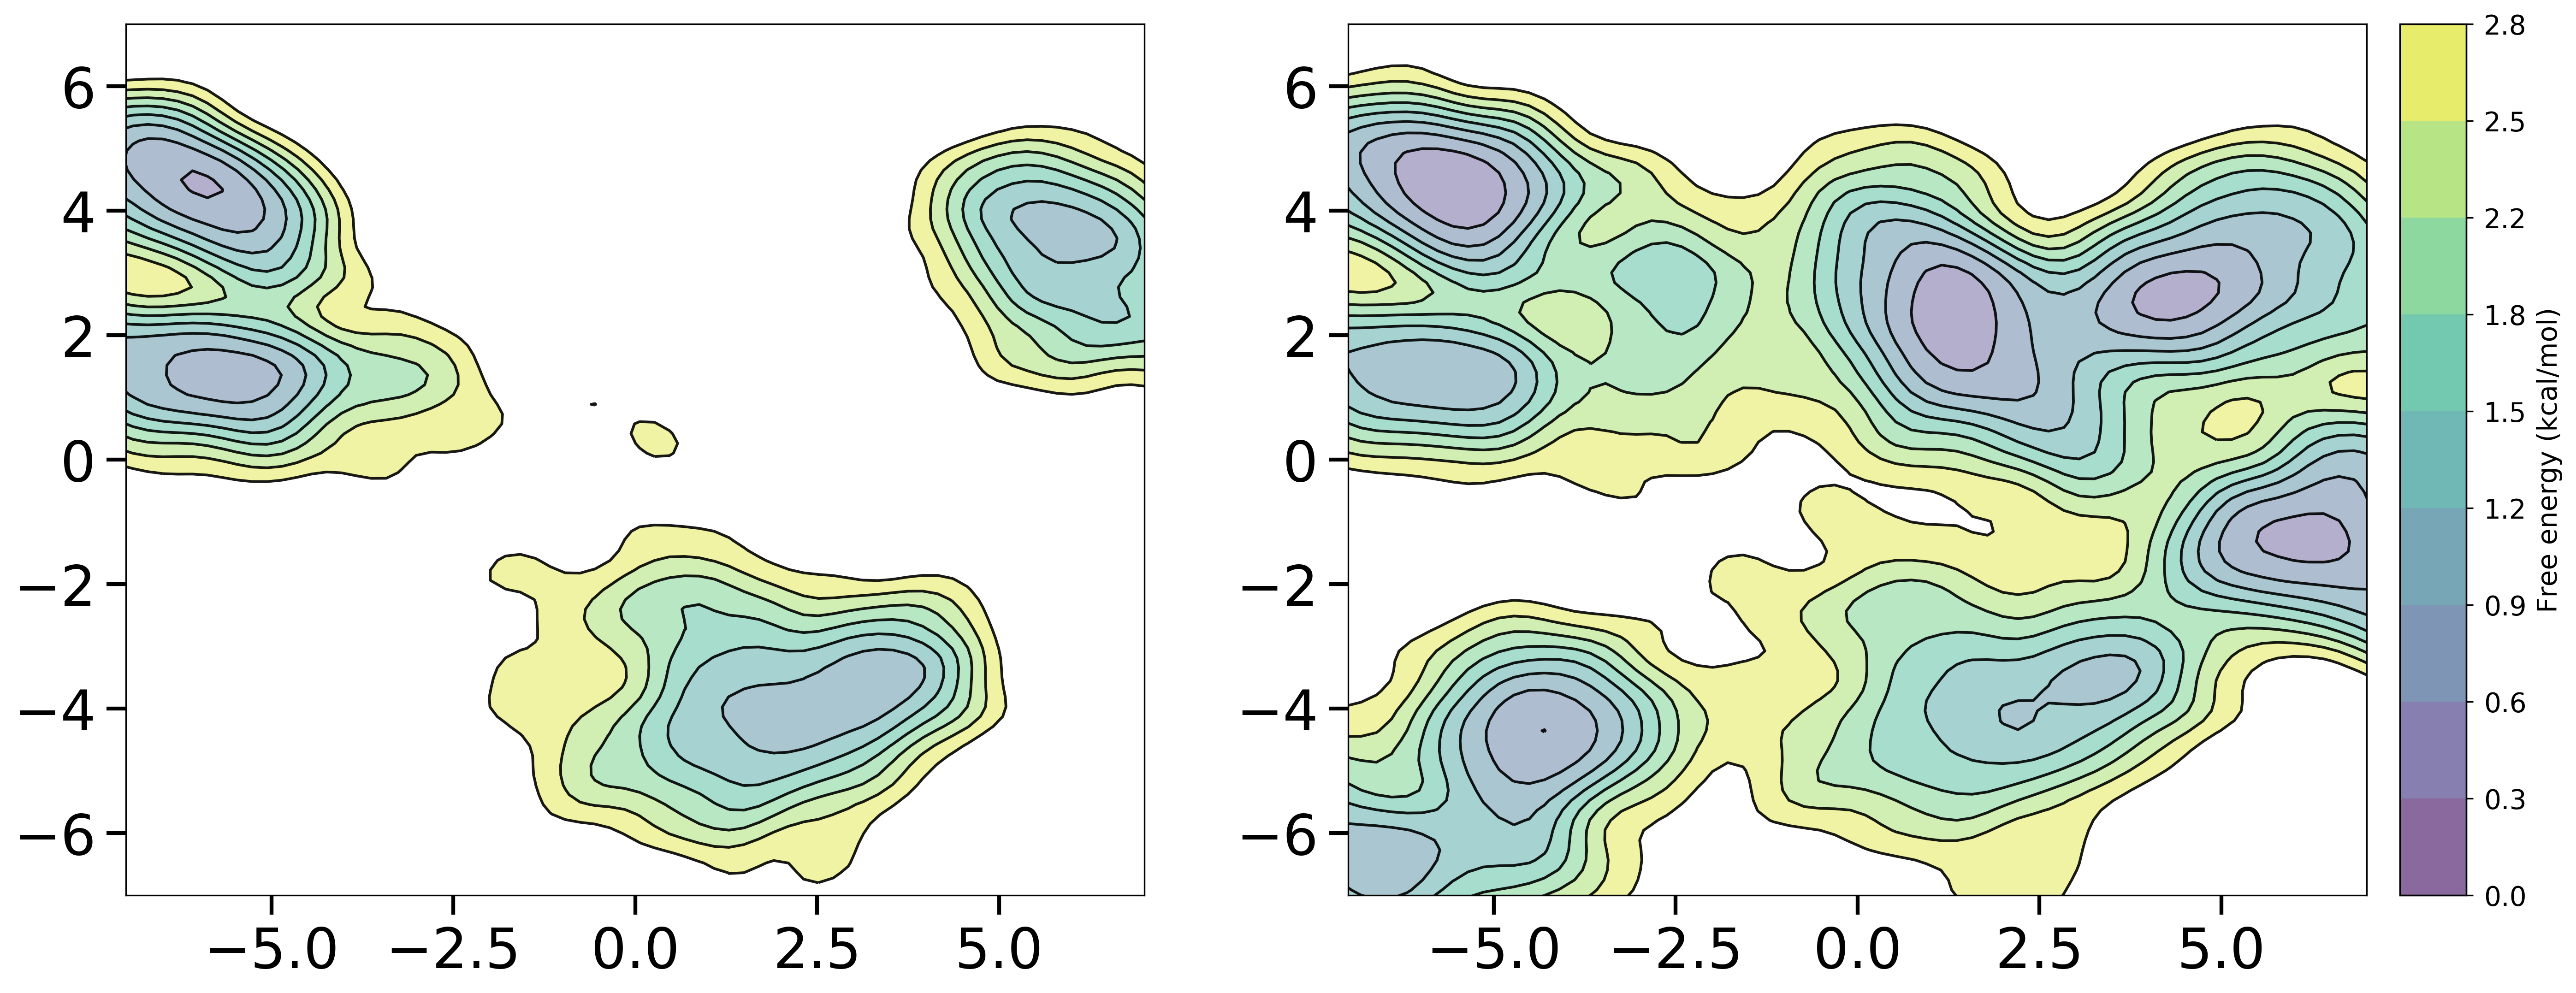

In [44]:

plt.figure(figsize=(24,9),dpi=300)

subplot2grid((1,2),(0,0))

plt.ylim(-7,7)
plt.xlim(-7,7)
#plt.title('APO CMD',fontweight='bold', size=20)
plt.tick_params(axis='x', labelsize='26',color='black', which='both',length=10,width=2)
plt.tick_params(axis='y', labelsize='26',color='black', which='both',length=10,width=2)
plot_Nice_PES(wt_proj,100,2)
#plt.xlim(-3.5, 2)


subplot2grid((1,2),(0,1))
plt.ylim(-7,7)
plt.xlim(-7,7)
#plt.title('Effector CMD',fontweight='bold', size=20)
plt.tick_params(axis='x', labelsize='26',color='black', which='both',length=10,width=2)
plt.tick_params(axis='y', labelsize='26',color='black', which='both',length=10,width=2)
plot_Nice_PES(all_proj,100,2)
#plt.xlim(-3.5, 2)

#plt.savefig('/home/carlac/projects/igps/paper/figures_si/figure_aMD_PCA_OxH/PCA_apo_vs_effector_aMD.png')


In [40]:
##Residue or atom contribution for each PC

dist_PCA_correl = pca_data1.feature_PC_correlation

### quin és el PC que més contribueix

n_argmax = 3
for ii, icorr in enumerate(dist_PCA_correl.T):
    print("For PC %u"%ii)
    argmaxs = [ii for ii in np.abs(icorr).argsort()[::-1] if not np.isnan(icorr[ii])]
    for art in argmaxs[:100]:
        print('%s %3.2f'%(feats[0].describe()[art], icorr[art]))
    print()

For PC 0
ATOM:ILE 272 CA 1343 0 z 0.91
ATOM:ALA 270 CA 1333 0 y -0.91
ATOM:GLN 271 CA 1338 0 y -0.91
ATOM:VAL 54 CA 263 0 z 0.90
ATOM:GLY 53 CA 258 0 z 0.90
ATOM:GLN 271 CA 1338 0 z 0.90
ATOM:VAL 303 CA 1497 0 z 0.90
ATOM:TYR 273 CA 1348 0 z 0.90
ATOM:HIS 302 CA 1492 0 z 0.90
ATOM:PRO 269 CA 1328 0 z 0.90
ATOM:ALA 270 CA 1333 0 z 0.89
ATOM:ARG 222 CA 1095 0 y -0.89
ATOM:PRO 269 CA 1328 0 y -0.89
ATOM:ASP 51 CA 248 0 z 0.89
ATOM:ASP 15 CA 69 0 y -0.88
ATOM:ARG 212 CA 1045 0 y 0.88
ATOM:LEU 267 CA 1319 0 z 0.88
ATOM:GLU 10 CA 44 0 z 0.88
ATOM:TRP 50 CA 243 0 z 0.87
ATOM:ASP 268 CA 1324 0 z 0.87
ATOM:GLN 79 CA 387 0 z 0.87
ATOM:THR 16 CA 74 0 y -0.87
ATOM:ASN 300 CA 1482 0 z 0.87
ATOM:ASN 78 CA 382 0 z 0.87
ATOM:TYR 18 CA 84 0 y -0.87
ATOM:ARG 6 CA 25 0 z 0.87
ATOM:LEU 259 CA 1280 0 z 0.87
ATOM:GLU 221 CA 1090 0 y -0.87
ATOM:VAL 262 CA 1295 0 z 0.87
ATOM:GLN 266 CA 1314 0 z 0.87
ATOM:PRO 263 CA 1299 0 z 0.87
ATOM:ASP 260 CA 1285 0 z 0.86
ATOM:PHE 356 CA 1760 0 z -0.86
ATOM:THR 52 CA 253 0

ATOM:ILE 118 CA 578 0 y 0.77
ATOM:ALA 152 CA 748 0 z -0.76
ATOM:ALA 151 CA 743 0 z -0.76
ATOM:TYR 150 CA 738 0 z -0.76
ATOM:THR 146 CA 718 0 y 0.75
ATOM:TRP 171 CA 842 0 z -0.75
ATOM:SER 119 CA 583 0 y 0.74
ATOM:VAL 145 CA 713 0 y 0.74
ATOM:THR 117 CA 573 0 y 0.74
ATOM:MET 169 CA 833 0 z -0.74
ATOM:ALA 154 CA 758 0 z -0.73
ATOM:TRP 90 CA 441 0 y 0.73
ATOM:ALA 149 CA 733 0 z -0.72
ATOM:ARG 144 CA 708 0 y 0.72
ATOM:THR 89 CA 436 0 y 0.72
ATOM:MET 148 CA 728 0 z -0.71
ATOM:GLU 176 CA 867 0 z -0.71
ATOM:LEU 116 CA 568 0 y 0.71
ATOM:PRO 170 CA 837 0 z -0.70
ATOM:PHE 168 CA 828 0 z -0.70
ATOM:ILE 88 CA 431 0 y 0.69
ATOM:TYR 172 CA 847 0 z -0.68
ATOM:ILE 147 CA 723 0 y 0.68
ATOM:ALA 143 CA 703 0 y 0.68
ATOM:TYR 18 CA 84 0 z -0.67
ATOM:TYR 155 CA 763 0 z -0.67
ATOM:PHE 75 CA 367 0 y 0.67
ATOM:PHE 17 CA 79 0 z -0.67
ATOM:PHE 174 CA 857 0 z -0.66
ATOM:ASP 15 CA 69 0 z -0.66
ATOM:THR 115 CA 563 0 y 0.65
ATOM:SER 139 CA 683 0 y 0.64
ATOM:TRP 157 CA 773 0 z -0.64
ATOM:ASN 177 CA 872 0 z -0.64
ATOM:

ATOM:ILE 335 CA 1656 0 x -0.38
ATOM:HIS 302 CA 1492 0 x -0.38
ATOM:THR 95 CA 466 0 y 0.38
ATOM:ARG 311 CA 1537 0 z -0.38
ATOM:CYS 344 CA 1701 0 x -0.38
ATOM:THR 347 CA 1716 0 x -0.38
ATOM:ARG 327 CA 1616 0 x 0.37
ATOM:ASN 225 CA 1110 0 y -0.37
ATOM:ALA 310 CA 1532 0 z -0.37
ATOM:LEU 326 CA 1611 0 x 0.37
ATOM:LEU 123 CA 603 0 y 0.37
ATOM:HIS 302 CA 1492 0 y -0.37
ATOM:TRP 94 CA 461 0 y 0.37
ATOM:PRO 269 CA 1328 0 x -0.37
ATOM:ILE 312 CA 1542 0 z -0.37
ATOM:VAL 208 CA 1025 0 x 0.37
ATOM:VAL 303 CA 1497 0 x -0.36
ATOM:PRO 96 CA 470 0 y 0.36
ATOM:GLY 330 CA 1631 0 x 0.36
ATOM:MET 193 CA 952 0 z 0.36
ATOM:LEU 209 CA 1030 0 y -0.36
ATOM:LEU 297 CA 1467 0 x -0.36
()
For PC 6
ATOM:ASN 2 CA 6 0 x 0.63
ATOM:PRO 3 CA 10 0 x 0.62
ATOM:MET 1 CA 1 0 x 0.60
ATOM:GLN 4 CA 15 0 x 0.59
ATOM:ILE 5 CA 20 0 x 0.54
ATOM:ASN 244 CA 1205 0 x 0.47
ATOM:LEU 116 CA 568 0 z -0.47
ATOM:GLU 241 CA 1190 0 x 0.46
ATOM:ALA 242 CA 1195 0 x 0.45
ATOM:LEU 246 CA 1215 0 x 0.44
ATOM:LYS 243 CA 1200 0 x 0.44
ATOM:LEU 245 CA

ATOM:THR 347 CA 1716 0 x 0.23
ATOM:THR 214 CA 1055 0 z 0.23
ATOM:GLN 58 CA 283 0 z 0.23
ATOM:TYR 18 CA 84 0 z -0.23
ATOM:PRO 170 CA 837 0 z -0.23
ATOM:TYR 32 CA 153 0 z 0.23
ATOM:TRP 359 CA 1774 0 y 0.23
ATOM:GLH 255 CA 1260 0 z 0.23
ATOM:GLU 340 CA 1681 0 y 0.23
ATOM:PRO 3 CA 10 0 x 0.23
ATOM:TYR 343 CA 1696 0 x 0.22
ATOM:LEU 108 CA 529 0 z -0.22
ATOM:HIN 66 CA 322 0 z 0.22
ATOM:PHE 168 CA 828 0 z -0.22
ATOM:TRP 228 CA 1125 0 z -0.22
ATOM:TYR 65 CA 317 0 x 0.22
ATOM:ALA 309 CA 1527 0 x -0.22
ATOM:THR 33 CA 158 0 z 0.22
ATOM:ASN 23 CA 109 0 y 0.22
ATOM:MET 169 CA 833 0 z -0.22
ATOM:GLU 24 CA 114 0 y 0.22
ATOM:GLN 64 CA 312 0 x 0.22
ATOM:HIN 253 CA 1250 0 z 0.22
ATOM:GLU 363 CA 1794 0 y 0.22
ATOM:SER 31 CA 148 0 z 0.22
ATOM:ILE 26 CA 123 0 z 0.22
ATOM:ASP 232 CA 1145 0 z -0.22
ATOM:ALA 67 CA 327 0 x 0.22
ATOM:ASN 382 CA 1889 0 x -0.21
ATOM:CYM 100 CA 489 0 x -0.21
ATOM:PRO 25 CA 118 0 z 0.21
ATOM:TYR 250 CA 1235 0 y -0.21
ATOM:HIS 182 CA 897 0 y -0.21
ATOM:ASN 244 CA 1205 0 y -0.21
ATOM

ATOM:ASN 240 CA 1185 0 z 0.17
ATOM:LYS 173 CA 852 0 z 0.17
ATOM:TYR 172 CA 847 0 z 0.17
ATOM:ASN 244 CA 1205 0 x -0.17
ATOM:SER 280 CA 1383 0 y 0.17
ATOM:ASN 379 CA 1874 0 x -0.17
ATOM:PHE 200 CA 986 0 y -0.17
ATOM:ARG 374 CA 1849 0 y 0.17
ATOM:HIN 66 CA 322 0 x -0.17
ATOM:TYR 315 CA 1557 0 z -0.17
ATOM:SER 366 CA 1809 0 y 0.17
ATOM:LEU 209 CA 1030 0 z 0.17
ATOM:ARG 190 CA 937 0 y -0.17
ATOM:PRO 25 CA 118 0 z -0.17
ATOM:ARG 211 CA 1040 0 z 0.17
ATOM:ARG 252 CA 1245 0 x -0.17
ATOM:GLU 241 CA 1190 0 z 0.16
ATOM:CYS 36 CA 173 0 z -0.16
ATOM:LEU 318 CA 1571 0 y 0.16
ATOM:LEU 369 CA 1824 0 y 0.16
()
For PC 12
ATOM:PRO 358 CA 1769 0 y -0.36
ATOM:GLU 128 CA 628 0 x 0.34
ATOM:ARG 129 CA 633 0 x 0.31
ATOM:LEU 362 CA 1789 0 y -0.30
ATOM:ASP 314 CA 1552 0 z 0.28
ATOM:HIS 365 CA 1804 0 z 0.28
ATOM:TRP 359 CA 1774 0 y -0.27
ATOM:SER 370 CA 1829 0 z 0.27
ATOM:PRO 3 CA 10 0 y -0.27
ATOM:SER 366 CA 1809 0 z 0.26
ATOM:ASN 7 CA 30 0 y -0.26
ATOM:ASN 382 CA 1889 0 x -0.26
ATOM:PHE 174 CA 857 0 z -0.25
AT

ATOM:ASN 23 CA 109 0 z 0.14
ATOM:ASN 379 CA 1874 0 x 0.14
ATOM:GLY 251 CA 1240 0 x 0.14
ATOM:TYR 28 CA 133 0 z 0.14
ATOM:PRO 358 CA 1769 0 y 0.14
ATOM:GLN 324 CA 1601 0 x -0.14
ATOM:CYS 354 CA 1751 0 y -0.14
ATOM:GLY 381 CA 1884 0 z 0.14
ATOM:GLU 187 CA 922 0 y 0.14
ATOM:GLU 24 CA 114 0 z 0.14
ATOM:GLN 58 CA 283 0 z -0.14
ATOM:GLN 378 CA 1869 0 x 0.13
ATOM:SER 280 CA 1383 0 z 0.13
ATOM:ILE 376 CA 1859 0 x -0.13
ATOM:PHE 61 CA 298 0 x -0.13
ATOM:ARG 6 CA 25 0 z 0.13
ATOM:THR 337 CA 1666 0 y 0.13
ATOM:GLU 363 CA 1794 0 x -0.13
ATOM:ASN 379 CA 1874 0 y -0.13
ATOM:ASP 346 CA 1711 0 y -0.13
ATOM:GLY 381 CA 1884 0 x 0.13
ATOM:THR 227 CA 1120 0 y 0.13
ATOM:ASN 177 CA 872 0 y 0.13
ATOM:ARG 311 CA 1537 0 x -0.13
ATOM:GLU 176 CA 867 0 y 0.13
ATOM:ARG 210 CA 1035 0 x 0.12
ATOM:LEU 181 CA 892 0 z -0.12
ATOM:LEU 27 CA 128 0 z 0.12
ATOM:LEU 362 CA 1789 0 x -0.12
ATOM:ARG 306 CA 1512 0 x -0.12
ATOM:ALA 309 CA 1527 0 y 0.12
ATOM:ARG 30 CA 143 0 y 0.12
ATOM:HIS 365 CA 1804 0 x -0.12
ATOM:ALA 310 CA 153

ATOM:GLU 364 CA 1799 0 z -0.11
ATOM:TYR 60 CA 293 0 y -0.11
ATOM:VAL 208 CA 1025 0 y 0.11
ATOM:LEU 192 CA 947 0 x 0.11
ATOM:GLN 58 CA 283 0 y -0.11
ATOM:MET 193 CA 952 0 x 0.11
ATOM:LYS 243 CA 1200 0 z -0.11
ATOM:HIS 111 CA 544 0 z -0.11
ATOM:SER 334 CA 1651 0 z -0.11
ATOM:LYS 103 CA 504 0 z -0.10
ATOM:ARG 129 CA 633 0 x -0.10
ATOM:ASP 99 CA 484 0 y 0.10
ATOM:SER 282 CA 1393 0 y -0.10
ATOM:SER 334 CA 1651 0 y -0.10
ATOM:PRO 98 CA 479 0 y 0.10
ATOM:TYR 313 CA 1547 0 x -0.10
ATOM:GLU 364 CA 1799 0 y -0.10
ATOM:LEU 362 CA 1789 0 z -0.10
ATOM:TYR 191 CA 942 0 x 0.10
ATOM:TYR 319 CA 1576 0 x -0.10
ATOM:THR 337 CA 1666 0 y -0.10
ATOM:CYM 100 CA 489 0 y 0.10
ATOM:ASN 382 CA 1889 0 x -0.10
ATOM:ARG 210 CA 1035 0 x 0.10
ATOM:PRO 96 CA 470 0 y 0.10
ATOM:ILE 26 CA 123 0 y 0.10
ATOM:MET 336 CA 1661 0 y -0.10
ATOM:GLY 288 CA 1422 0 x -0.10
ATOM:TYR 131 CA 643 0 x -0.10
ATOM:CYM 284 CA 1402 0 z 0.10
ATOM:LEU 27 CA 128 0 y 0.10
ATOM:ASP 314 CA 1552 0 x -0.09
ATOM:GLN 332 CA 1641 0 z -0.09
ATOM:ARG 12

ATOM:LEU 72 CA 352 0 y 0.13
ATOM:ALA 67 CA 327 0 y 0.13
ATOM:CYS 136 CA 668 0 z 0.13
ATOM:ARG 133 CA 653 0 z 0.12
ATOM:VAL 59 CA 288 0 z -0.12
ATOM:GLN 380 CA 1879 0 x 0.12
ATOM:GLN 380 CA 1879 0 z -0.12
ATOM:LEU 135 CA 663 0 z 0.12
ATOM:HIS 365 CA 1804 0 x 0.12
ATOM:LEU 189 CA 932 0 x -0.12
ATOM:TYR 28 CA 133 0 z -0.12
ATOM:TYR 32 CA 153 0 x -0.12
ATOM:LEU 326 CA 1611 0 z -0.12
ATOM:ASN 78 CA 382 0 y 0.12
ATOM:ASN 379 CA 1874 0 x 0.12
ATOM:LEU 230 CA 1135 0 y -0.12
ATOM:HIS 234 CA 1155 0 z 0.11
ATOM:LEU 135 CA 663 0 x -0.11
ATOM:TYR 60 CA 293 0 z -0.11
ATOM:ARG 327 CA 1616 0 z -0.11
ATOM:GLN 266 CA 1314 0 y -0.11
ATOM:ILE 26 CA 123 0 z -0.11
ATOM:HIS 365 CA 1804 0 y 0.11
ATOM:CYM 284 CA 1402 0 z -0.11
ATOM:GLU 24 CA 114 0 x -0.11
ATOM:MET 325 CA 1606 0 z -0.11
ATOM:GLU 187 CA 922 0 y 0.11
ATOM:ALA 322 CA 1591 0 x 0.11
ATOM:LEU 267 CA 1319 0 y -0.11
ATOM:LEU 185 CA 912 0 y 0.11
()
For PC 21
ATOM:ASN 382 CA 1889 0 x 0.32
ATOM:GLY 381 CA 1884 0 x 0.29
ATOM:LEU 185 CA 912 0 y 0.22
ATOM:GL

ATOM:VAL 208 CA 1025 0 x 0.11
ATOM:GLN 324 CA 1601 0 x 0.11
ATOM:GLU 110 CA 539 0 z 0.11
ATOM:ASN 382 CA 1889 0 z 0.10
ATOM:ALA 329 CA 1626 0 x 0.10
ATOM:ARG 133 CA 653 0 x -0.10
ATOM:SER 31 CA 148 0 z -0.10
ATOM:CYS 239 CA 1180 0 x -0.10
ATOM:ARG 132 CA 648 0 x -0.10
ATOM:ARG 212 CA 1045 0 z -0.10
ATOM:ARG 257 CA 1270 0 y -0.10
ATOM:THR 227 CA 1120 0 x 0.10
ATOM:HIN 66 CA 322 0 z -0.10
ATOM:PHE 61 CA 298 0 x -0.10
ATOM:ASP 232 CA 1145 0 z -0.10
ATOM:PHE 296 CA 1462 0 y -0.10
ATOM:ALA 254 CA 1255 0 y -0.10
ATOM:ASP 260 CA 1285 0 y -0.10
ATOM:SER 264 CA 1304 0 y -0.10
ATOM:GLY 330 CA 1631 0 x 0.10
ATOM:MET 336 CA 1661 0 y -0.10
ATOM:ASP 130 CA 638 0 y 0.10
ATOM:ASP 328 CA 1621 0 x 0.09
ATOM:GLN 332 CA 1641 0 x 0.09
ATOM:ASN 7 CA 30 0 x 0.09
ATOM:PRO 170 CA 837 0 x 0.09
ATOM:HIS 365 CA 1804 0 z -0.09
ATOM:ASP 339 CA 1676 0 y -0.09
ATOM:PHE 21 CA 99 0 y -0.09
ATOM:GLU 340 CA 1681 0 y -0.09
ATOM:TYR 250 CA 1235 0 x 0.09
ATOM:LEU 377 CA 1864 0 y -0.09
ATOM:GLN 64 CA 312 0 y -0.09
ATOM:HIN 2

ATOM:SER 93 CA 456 0 x 0.08
ATOM:LYS 320 CA 1581 0 x -0.08
ATOM:ALA 134 CA 658 0 z 0.08
ATOM:VAL 92 CA 451 0 x 0.08
ATOM:ARG 6 CA 25 0 y -0.08
ATOM:TYR 172 CA 847 0 z -0.08
ATOM:TYR 131 CA 643 0 z 0.08
ATOM:ASN 244 CA 1205 0 z -0.08
ATOM:VAL 229 CA 1130 0 z -0.08
ATOM:ALA 67 CA 327 0 y -0.08
ATOM:CYS 136 CA 668 0 z 0.08
ATOM:ASN 78 CA 382 0 y 0.08
ATOM:TRP 359 CA 1774 0 x 0.08
ATOM:ARG 137 CA 673 0 z 0.08
ATOM:THR 227 CA 1120 0 z -0.08
ATOM:PRO 3 CA 10 0 y 0.07
ATOM:ASN 203 CA 1001 0 x -0.07
ATOM:ASP 232 CA 1145 0 x 0.07
ATOM:ILE 26 CA 123 0 x 0.07
ATOM:ALA 242 CA 1195 0 x 0.07
ATOM:ALA 322 CA 1591 0 x 0.07
ATOM:GLN 140 CA 688 0 z 0.07
ATOM:LEU 135 CA 663 0 z 0.07
ATOM:CYS 354 CA 1751 0 x 0.07
ATOM:CYS 76 CA 372 0 y 0.07
()
For PC 27
ATOM:TYR 28 CA 133 0 x -0.25
ATOM:VAL 208 CA 1025 0 x 0.20
ATOM:VAL 208 CA 1025 0 z -0.18
ATOM:LEU 27 CA 128 0 x -0.18
ATOM:GLU 128 CA 628 0 x -0.18
ATOM:PHE 356 CA 1760 0 y -0.17
ATOM:ARG 129 CA 633 0 x -0.16
ATOM:SER 370 CA 1829 0 x 0.16
ATOM:LEU 377 CA 

ATOM:ILE 5 CA 20 0 y 0.08
ATOM:TYR 350 CA 1731 0 y -0.08
()
For PC 30
ATOM:GLN 332 CA 1641 0 z -0.22
ATOM:VAL 333 CA 1646 0 z -0.18
ATOM:GLN 64 CA 312 0 z -0.17
ATOM:GLU 187 CA 922 0 y -0.17
ATOM:ARG 6 CA 25 0 x 0.16
ATOM:ALA 331 CA 1636 0 z -0.16
ATOM:ILE 5 CA 20 0 x 0.16
ATOM:ILE 188 CA 927 0 y -0.15
ATOM:MET 325 CA 1606 0 x -0.14
ATOM:THR 184 CA 907 0 y -0.14
ATOM:ASN 7 CA 30 0 y 0.14
ATOM:GLY 29 CA 138 0 z 0.13
ATOM:CYS 247 CA 1220 0 z 0.13
ATOM:ASP 224 CA 1105 0 z -0.12
ATOM:ALA 329 CA 1626 0 x -0.12
ATOM:TYR 28 CA 133 0 z 0.12
ATOM:ASP 328 CA 1621 0 x -0.12
ATOM:GLY 330 CA 1631 0 z -0.12
ATOM:ALA 322 CA 1591 0 x -0.12
ATOM:TYR 65 CA 317 0 z -0.12
ATOM:LEU 27 CA 128 0 x 0.11
ATOM:PRO 63 CA 307 0 z -0.11
ATOM:LEU 326 CA 1611 0 x -0.11
ATOM:GLY 371 CA 1834 0 x 0.11
ATOM:GLN 4 CA 15 0 x 0.11
ATOM:TYR 28 CA 133 0 x 0.11
ATOM:PHE 61 CA 298 0 y 0.11
ATOM:GLY 330 CA 1631 0 x -0.11
ATOM:LEU 181 CA 892 0 y -0.11
ATOM:SER 370 CA 1829 0 x 0.11
ATOM:MET 1 CA 1 0 z 0.10
ATOM:ASN 7 CA 30 0 x 0.

ATOM:LEU 377 CA 1864 0 z -0.10
ATOM:ARG 351 CA 1736 0 y 0.10
ATOM:GLY 251 CA 1240 0 y 0.10
ATOM:ILE 376 CA 1859 0 z -0.09
ATOM:ASN 23 CA 109 0 y 0.09
ATOM:SER 73 CA 357 0 y -0.09
ATOM:TYR 60 CA 293 0 z -0.09
ATOM:ARG 30 CA 143 0 z 0.09
ATOM:LYS 186 CA 917 0 y 0.09
ATOM:ASN 225 CA 1110 0 x 0.09
ATOM:ARG 45 CA 218 0 x -0.09
ATOM:CYM 284 CA 1402 0 z -0.09
ATOM:MET 231 CA 1140 0 y -0.09
ATOM:TRP 281 CA 1388 0 z -0.09
ATOM:SER 46 CA 223 0 x -0.09
ATOM:ARG 45 CA 218 0 z -0.09
ATOM:GLY 44 CA 213 0 y 0.09
ATOM:ASN 204 CA 1006 0 x 0.08
ATOM:ASN 203 CA 1001 0 x 0.08
ATOM:LEU 373 CA 1844 0 z -0.08
ATOM:LEU 27 CA 128 0 z 0.08
ATOM:LEU 326 CA 1611 0 z -0.08
ATOM:HIS 365 CA 1804 0 y -0.08
ATOM:LEU 185 CA 912 0 y 0.08
ATOM:ASP 224 CA 1105 0 x 0.08
ATOM:ARG 327 CA 1616 0 z -0.08
ATOM:ASN 47 CA 228 0 x -0.08
ATOM:GLY 248 CA 1225 0 y 0.08
ATOM:ALA 151 CA 743 0 z 0.08
ATOM:LEU 323 CA 1596 0 z -0.08
ATOM:TRP 74 CA 362 0 y -0.08
ATOM:TRP 287 CA 1417 0 y 0.08
ATOM:TRP 171 CA 842 0 x -0.08
ATOM:ASN 204 CA 10

ATOM:TYR 65 CA 317 0 x 0.16
ATOM:LEU 27 CA 128 0 x -0.15
ATOM:GLY 44 CA 213 0 x -0.15
ATOM:THR 33 CA 158 0 z 0.14
ATOM:ASP 205 CA 1011 0 x 0.12
ATOM:GLY 29 CA 138 0 x -0.11
ATOM:ARG 43 CA 208 0 x -0.11
ATOM:TYR 28 CA 133 0 x -0.11
ATOM:TRP 34 CA 163 0 z 0.11
ATOM:ILE 188 CA 927 0 y 0.11
ATOM:LEU 35 CA 168 0 z 0.11
ATOM:VAL 59 CA 288 0 y -0.11
ATOM:GLY 44 CA 213 0 y -0.10
ATOM:PHE 61 CA 298 0 y -0.10
ATOM:TYR 60 CA 293 0 y -0.10
ATOM:HIN 66 CA 322 0 x 0.10
ATOM:LYS 42 CA 203 0 x -0.10
ATOM:MET 69 CA 337 0 x 0.10
ATOM:ILE 376 CA 1859 0 z 0.09
ATOM:GLH 68 CA 332 0 x 0.09
ATOM:TYR 191 CA 942 0 y 0.09
ATOM:ARG 45 CA 218 0 x -0.09
ATOM:ALA 254 CA 1255 0 z -0.09
ATOM:SER 139 CA 683 0 z -0.09
ATOM:ALA 67 CA 327 0 x 0.09
ATOM:TYR 32 CA 153 0 z 0.09
ATOM:ARG 45 CA 218 0 y -0.09
ATOM:ALA 67 CA 327 0 z 0.09
ATOM:LYS 62 CA 303 0 x 0.09
ATOM:GLU 187 CA 922 0 y 0.08
ATOM:PRO 206 CA 1015 0 x 0.08
ATOM:LEU 189 CA 932 0 y 0.08
ATOM:SER 31 CA 148 0 x -0.08
ATOM:LEU 192 CA 947 0 y 0.08
ATOM:ARG 43 CA 208 

# Extract PCs

In [45]:
import pyemma
import re
import os
import string
import matplotlib.pylab as plt
import numpy as np
from pylab import *
import pyemma.msm as msm
import pyemma.plots as mplt
import pyemma.coordinates as coor
from itertools import combinations
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
argmax_pc1=np.vstack(P_test)[:,0].argmax()
argmin_pc1=np.vstack(P_test)[:,0].argmin()
argmax_pc2=np.vstack(P_test)[:,1].argmax()
argmin_pc2=np.vstack(P_test)[:,1].argmin()

In [48]:
trajs[0]

['/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/quadruple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
 '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/triple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
 '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/wt_backbone_v2_all_mdtraj_aligned.dcd',
 '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/quadruple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
 '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/triple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
 '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/wt_backbone_v2_all_mdtraj_aligned.dcd']

In [49]:
alltraj=[]

In [50]:
alltraj.append(trajs[0])

In [51]:
alltraj_all=[]

In [53]:
alltraj_all.append(alltraj)

In [54]:
alltraj_all

[[['/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/quadruple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
   '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/triple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
   '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/wt_backbone_v2_all_mdtraj_aligned.dcd',
   '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/quadruple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
   '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/triple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
   '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/wt_backbone_v2_all_mdtraj_aligned.dcd']]]

In [55]:
#Here you should create a list with only the trajectories.
alltraj_all[0][0]

['/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/quadruple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
 '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/triple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
 '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/wt_backbone_v2_all_mdtraj_aligned.dcd',
 '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/quadruple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
 '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/triple_mutant_backbone_v2_all_mdtraj_aligned.dcd',
 '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/wt_backbone_v2_all_mdtraj_aligned.dcd']

In [56]:
origin_effector = coor.source(alltraj_all[0][0],feats[0])
print(feats[0])
print('\n')
print(argmin_pc2)
origin_effector.trajectory_lengths()

03-07-24 08:50:25 pyemma.coordinates.data.feature_reader.FeatureReader[2] WARNING  duplicate files/arrays detected


4146


array([4801, 4801, 4801])

In [57]:
cumsum(origin_effector.trajectory_lengths()*10*10000*0.002)/1000

array([ 960.2, 1920.4, 2880.6])

In [59]:
#pc1, MAX
I = 0
J = 0
for frames in origin_effector.trajectory_lengths():
    I += frames
    if I >= argmax_pc1:
        argmax_pc1 = argmax_pc1 - (I - frames)
        break
    else:
        J += 1
#MIN              
i = 0
j = 0
for frames in origin_effector.trajectory_lengths():
    i += frames
    if i >= argmin_pc1:
        argmin_pc1 = argmin_pc1 - (i - frames)
        break
    else:
        j += 1




#pc2, MAX
K = 0
L = 0
for frames in origin_effector.trajectory_lengths():
    K += frames
    if K >= argmax_pc2:
        argmax_pc2 = argmax_pc2 - (K - frames)
        break
    else:
        L += 1
#MIN      
k = 0
l = 0
for frames in origin_effector.trajectory_lengths():
    k += frames
    if k >= argmin_pc2:
        argmin_pc2 = argmin_pc2 - (k - frames)
        break
    else:
        l += 1

        
print('\033[4mValues for PC1 MAX\033[0m \n argmax() = '+ str(argmax_pc1)+'\n MD = '+ str(J)+'\n Frame(MD) = '+ str(argmax_pc1)+'\n')
print('\033[4mValues for PC1 MIN\033[0m \n argmin() = '+ str(argmin_pc1)+'\n MD = '+ str(j)+'\n Frame(MD) = '+ str(argmin_pc1)+'\n')
print('\033[4mValues for PC2 MAX\033[0m \n argmax() = '+ str(argmax_pc2)+'\n MD = '+ str(L)+'\n Frame(MD) = '+ str(argmax_pc2)+'\n')
print('\033[4mValues for PC2 MIN\033[0m \n argmin() = '+ str(argmin_pc2)+'\n MD = '+ str(l)+'\n Frame(MD) = '+ str(argmin_pc2)+'\n') 

Values for PC1 MAX 
 argmax() = 2397
 MD = 1
 Frame(MD) = 2397

Values for PC1 MIN 
 argmin() = 2480
 MD = 2
 Frame(MD) = 2480

Values for PC2 MAX 
 argmax() = 2494
 MD = 2
 Frame(MD) = 2494

Values for PC2 MIN 
 argmin() = 4146
 MD = 0
 Frame(MD) = 4146



In [60]:
list_pc1_max=[]
list_pc1_min=[]
list_pc1_max.append(array([J,argmax_pc1]))
list_pc1_min.append(array([j,argmin_pc1]))

list_pc2_max=[]
list_pc2_min=[]
list_pc2_max.append(array([L,argmax_pc2]))
list_pc2_min.append(array([l,argmin_pc2]))

In [61]:
print(list_pc1_min)
print(origin_effector.trajfiles)

[array([   2, 2480])]
['/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/triple_mutant_backbone_v2_all_mdtraj_aligned.dcd', '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/wt_backbone_v2_all_mdtraj_aligned.dcd', '/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/quadruple_mutant_backbone_v2_all_mdtraj_aligned.dcd']


</home/ccalvotusell/.conda/envs/py27/lib/python2.7/site-packages/decorator.pyc:decorator-gen-139>:2: PyEMMA_DeprecationWarning: Call to deprecated function "trajfiles". Called from </home/ccalvotusell/.conda/envs/py27/lib/python2.7/site-packages/decorator.pyc:decorator-gen-139> line 2. Please use "filenames" property.


In [62]:
outfile_max='/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/pc1_max.pdb'
outfile_min='/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/pc1_min.pdb'
coor.save_traj(origin_effector,list_pc1_max, outfile=outfile_max)
coor.save_traj(origin_effector,list_pc1_min, outfile=outfile_min)
outfile_max='/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/pc2_max.pdb'
outfile_min='/net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/pc2_min.pdb'
coor.save_traj(origin_effector,list_pc2_max, outfile=outfile_max)
coor.save_traj(origin_effector,list_pc2_min, outfile=outfile_min)

03-07-24 08:54:23 pyemma.coordinates.api INFO     Created file /net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/pc1_max.pdb
03-07-24 08:54:23 pyemma.coordinates.api INFO     Created file /net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/pc1_min.pdb
03-07-24 08:54:23 pyemma.coordinates.api INFO     Created file /net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/pc2_max.pdb
03-07-24 08:54:23 pyemma.coordinates.api INFO     Created file /net/gpfs-amarolab/ccalvotusell/projects/apobec/fla3b/PCs_figure/test/pc2_min.pdb


This will give you the structural meaning of the minimas and max of the PCs. 

# Clustering

Extracting the clusters, you can visualize the structural meaning of each minima of the plot

In [63]:
##You can change here the number of clusters

n_clusters = 20
multi_dtrajs=[]
cl_rep1 = coor.cluster_kmeans(data=P_test, k=n_clusters, stride=1,max_iter=150)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs_rep1 = cl_rep1.dtrajs
multi_dtrajs.append(dtrajs_rep1)
cc_x_rep1 = cl_rep1.clustercenters[:,0]
cc_y_rep1 = cl_rep1.clustercenters[:,1]

Box(children=(Text(value=u''), IntProgress(value=0)))

Box(children=(Text(value=u''), IntProgress(value=0)))

Box(children=(Text(value=u''), IntProgress(value=0)))

03-07-24 08:57:20 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] INFO     Cluster centers converged after 58 steps.


Box(children=(Text(value=u''), IntProgress(value=0)))

In [64]:
def plot_Nice_PES(P_test,bins,sigma):
    import scipy.ndimage
    from scipy.ndimage.filters import gaussian_filter
    from matplotlib.ticker import FormatStrFormatter
    
    mpl.style.use("seaborn-paper")
    alldata=np.vstack(P_test)
    min1=np.min(alldata[:,0])
    max1=np.max(alldata[:,0])
    min2=np.min(alldata[:,1])
    max2=np.max(alldata[:,1])
    
    tickspacing1=1.0
    tickspacing2=1.0
    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=bins)
#    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=50)
    z += 0.1
    # compute free energies
    F = -np.log(z)
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]

    xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=14)
    yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=14)
    #data = scipy.ndimage.zoom(F.T, 200)
#    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
    plt.contourf(data,alpha=0.5,cmap='jet', cbar=True,levels=levels,extent=extent)
    plt.xlabel('PC1', size=20)
    plt.ylabel('PC2', size=20)
    plt.tick_params(axis='x', labelsize=25)
    plt.tick_params(axis='y', labelsize=25)
    plot(cc_x_rep1,cc_y_rep1, linewidth=0, marker='o', markersize=5, color='black')
    for i in range(n_clusters):
        annotate("%i"%i, xy=(cc_x_rep1[i],cc_y_rep1[i]), size=15)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
    cax = plt.axes([0.81, 0.1, 0.02, 0.7])
    plt.colorbar(cax=cax, format='%.1f').set_label('Free energy (kcal/mol)', fontsize=14, labelpad=5, y= 0.5)
    cax.axes.tick_params(labelsize=14)
    #plt.colorbar(cax=cax, format='%.2f').tick_params(labelsize=10)
    #       savefig('./contour_plot_tica_kmeans.png')-- 

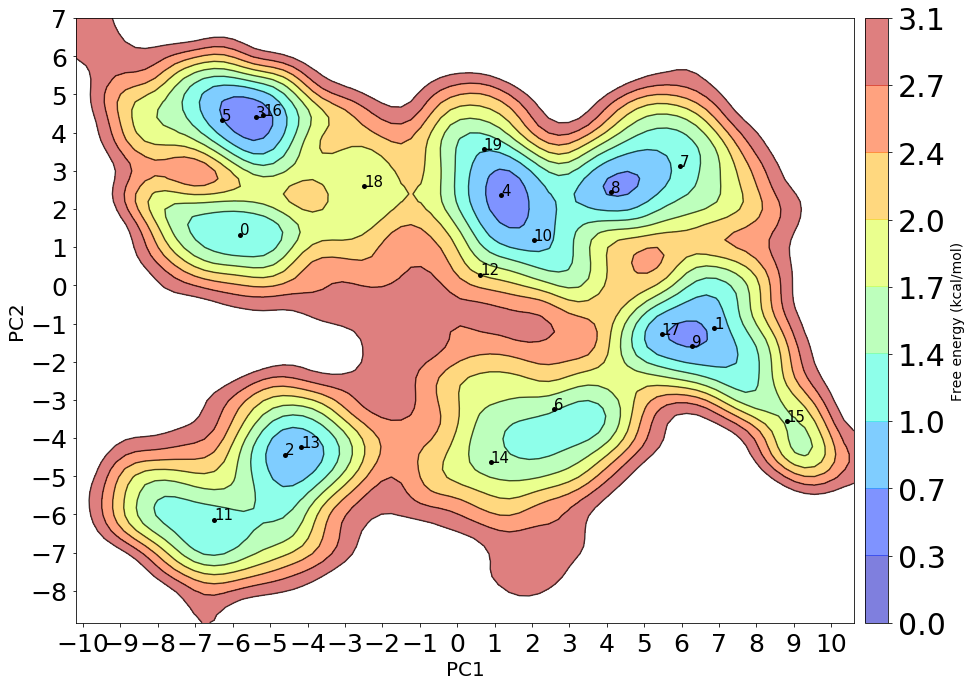

In [65]:
figure(figsize=(16, 12))
#plt.ylim(-1.1,2)
#plt.xlim(-3.3, 1.5)
#plt.title('1VA4 wild-type',fontweight='bold', size=20)
plot_Nice_PES(all_data,80,2)
#plt.xlim(-3.5, 2)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)

In [47]:
##Here you have the information of the cluster number \ number of frames that this cluster has (population of the cluster)

index_cluster = cl_rep1.index_clusters

i = 0
for cluster in index_cluster:
        print (i, cluster.size)
        #name="path/cluster_"+str(i)+".pdb"
        #pyemma.coordinates.save_traj(traj_inp=inp, indexes=cluster, outfile=name, verbose=False)
        i=i+1

0 2386
1 1396
2 2130
3 2394
4 1102
5 1500
6 2390
7 1948
8 1718
9 1654
10 730
11 822
12 588
13 460
14 1000
15 726
16 1588
17 1802
18 894
19 1578


In [48]:
#Here you can define i as the number of cluster you are interested to save and visualize as a .dcd file
#13,5,18,11,16,23

i=0

name="/path/PC_cluster_"+str(i)+".dcd"

pyemma.coordinates.save_traj(traj_inp=trajs[0],top=top1, indexes=index_cluster[i], outfile=name, verbose=False)

## PROJECTION AFTER CLUSTERING

In [49]:
## This is in case you want to make sure that the extracted cluster represent the selected minima, so you can project the cluster as points in the plot
# First we align trajectories to the same reference with mdtraj

path_input_proj="/path/"


dirList_pro=sorted(os.listdir(path_input_proj))

trajs_proj=[]
tops=[]

for filename in dirList_pro:
    if "0.dcd" in filename.lower():
        print ("Aligning traj: "+str(filename))
        trajectory=mdtraj.load_dcd((path_input_proj+"/"+filename),top=top1)
        topology=mdtraj.load_pdb(top1)
        aligned_traj=mdtraj.Trajectory.superpose(trajectory,reference=topology,frame=0)
        print ("Saving aligned traj: "+str(filename))
        filename=path_input_proj+"/"+filename.replace(".dcd","")+"_mdtraj_aligned.dcd"
        mdtraj.Trajectory.save_dcd(aligned_traj, filename)

Aligning traj: PC_cluster_0.dcd
Saving aligned traj: PC_cluster_0.dcd


In [50]:
dirList_pro=sorted(os.listdir(path_input_proj))


for filename in dirList_pro:
	if ("mdtraj" and "aligned") in filename.lower():
		trajs_proj.append(path_input_proj+"/"+filename)

trajs_pro=[]

trajs_pro.append(trajs_proj)

trajs_pro

[['/home/ferran/test_PCs/test_ferran/proj//PC_cluster_0_mdtraj_aligned.dcd']]

In [51]:
sources_proj=[]

for traj in range(0,len(trajs_pro)):
    print (traj,len(trajs_pro))
    sources_proj.append(pyemma.coordinates.load(trajs_pro[traj],features=feats[traj],chunk_size=100,stride=1))

0 1


/tmp/ipykernel_9244/778989359.py:5: PyEMMA_DeprecationWarning: Passed deprecated argument "chunk_size", please use "chunksize"
  sources_proj.append(pyemma.coordinates.load(trajs_pro[traj],features=feats[traj],chunk_size=100,stride=1))


getting output of FeatureReader:   0%|                                                                        …

In [52]:
MD_proj=tica_data1.transform(sources_proj[0])

Text(0.5, 0, 'time (2 ns)')

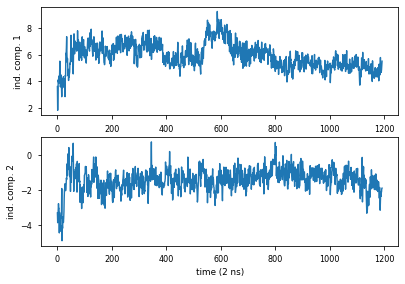

In [53]:
Y_test_MD=np.vstack(MD_proj)

subplot2grid((2,1),(0,0))
plot(Y_test_MD[:,0])
ylabel('ind. comp. 1')
subplot2grid((2,1),(1,0))
plot(Y_test_MD[:,1])
ylabel('ind. comp. 2')
xlabel('time (2 ns)')

In [59]:
# We now compute the free energy of the combined dataset of the effector-bound state
eix_x=0
eix_y=1

all_data_MD=np.vstack(MD_proj)

In [57]:
def plot_Nice_PES(P_test,bins,sigma):
    import scipy.ndimage
    from scipy.ndimage.filters import gaussian_filter
    from matplotlib.ticker import FormatStrFormatter
    
    mpl.style.use("seaborn-paper")
    alldata=np.vstack(P_test)
    min1=np.min(alldata[:,0])
    max1=np.max(alldata[:,0])
    min2=np.min(alldata[:,1])
    max2=np.max(alldata[:,1])
    
    tickspacing1=5.0
    tickspacing2=5.0
    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=bins)
#    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=50)
    z += 0.1
    # compute free energies
    F = -np.log(z)
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]

    xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=20)
    yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=20)
    #data = scipy.ndimage.zoom(F.T, 200)
#    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
    plt.contourf(data,alpha=0.5,cmap='viridis', cbar=True,levels=levels,extent=extent)
    plt.xlabel('PC1', size=20)
    plt.ylabel('PC2', size=20)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.scatter(all_data_MD[:,eix_x], all_data_MD[:,eix_y], s=20, c='blue')

#    plot(cc_x_rep1,cc_y_rep1, linewidth=0, marker='o', markersize=5, color='black)
#    for i in range(n_clusters):
#        annotate("%i"%i, xy=(cc_x_rep1[i],cc_y_rep1[i]), size=15)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
    cax = plt.axes([0.81, 0.1, 0.02, 0.7])
    plt.colorbar(cax=cax, format='%.1f').set_label('Free energy (kcal/mol)', fontsize=14, labelpad=5, y= 0.5)
    cax.axes.tick_params(labelsize=14)
    #plt.colorbar(cax=cax, format='%.2f').tick_params(labelsize=10)
    #       savefig('./contour_plot_tica_kmeans.png')-- 

In [55]:
#13,5,18,11,16,23

i=15

name="/path/PC_cluster_"+str(i)+".dcd"

pyemma.coordinates.save_traj(traj_inp=efftraj_all[0],top=tops, indexes=index_cluster[i], outfile=name, verbose=False)

TypeError: traj_inp cannot be a list of files without an input top of type str (eg filename.pdb), mdtraj.Trajectory or mdtraj.Topology. Got type <class 'list'> instead

In [55]:
#13,5,18,11,16,23

i=15

name="/path/PC_cluster_"+str(i)+".dcd"

pyemma.coordinates.save_traj(traj_inp=efftraj_all[0],top=tops, indexes=index_cluster[i], outfile=name, verbose=False)

TypeError: traj_inp cannot be a list of files without an input top of type str (eg filename.pdb), mdtraj.Trajectory or mdtraj.Topology. Got type <class 'list'> instead

/tmp/ipykernel_9244/396931023.py:29: UserWarning: The following kwargs were not used by contour: 'cbar'
  plt.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
/tmp/ipykernel_9244/396931023.py:30: UserWarning: The following kwargs were not used by contour: 'cbar'
  plt.contourf(data,alpha=0.5,cmap='viridis', cbar=True,levels=levels,extent=extent)


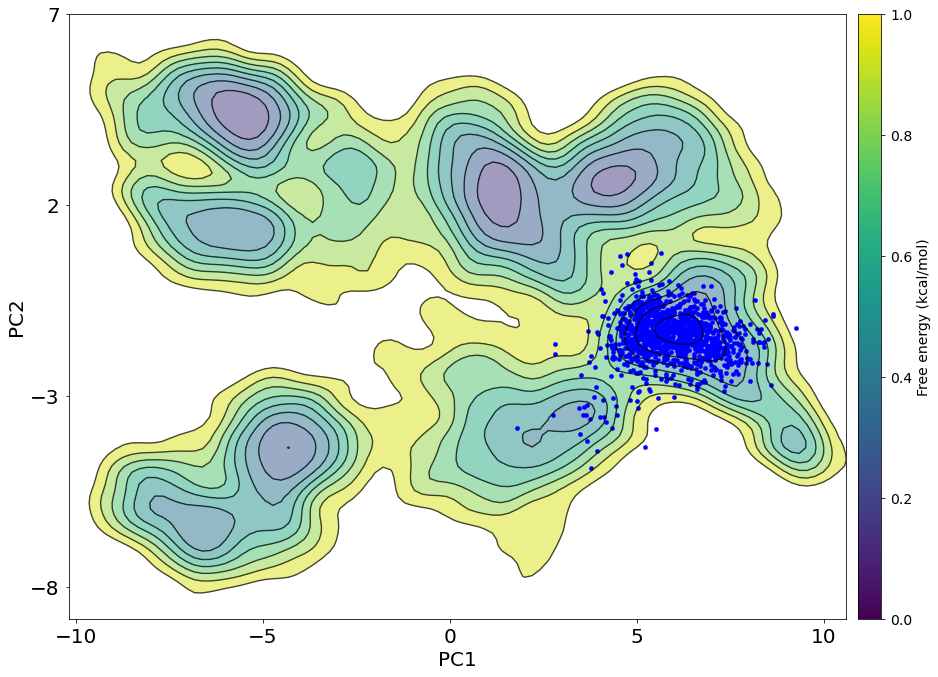

In [58]:
figure(figsize=(16, 12))
#plt.ylim(-1.1,2)
#plt.xlim(-3.3, 1.5)
#plt.title('1VA4 wild-type',fontweight='bold', size=20)
plot_Nice_PES(all_data,100,2)
#plt.xlim(-3.5, 2)
#lt.tick_params(axis='x', labelsize=14)
#lt.tick_params(axis='y', labelsize=14)